In [133]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [134]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,text,desc

In [136]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine,reflect=True)

In [138]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [139]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [140]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [141]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

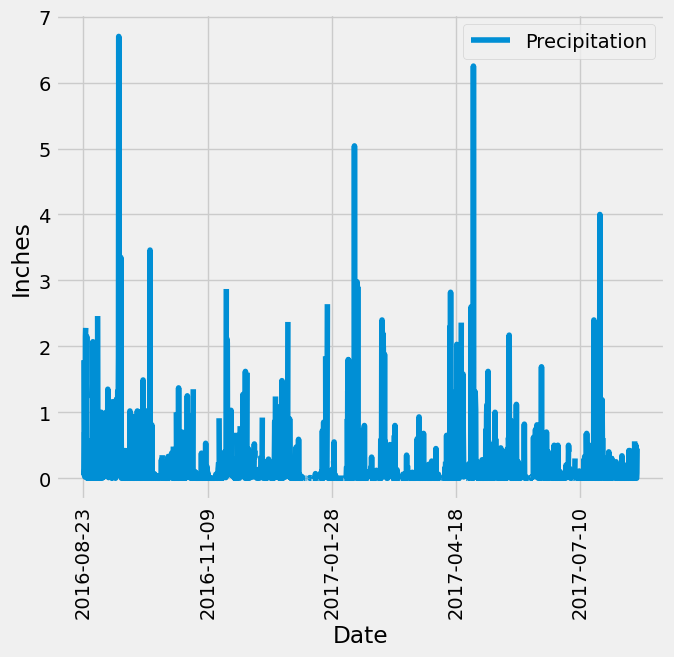

In [142]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

last_date= dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rows=[{'Date':result[0],'Precipitation':result[1]} for result in results]

#creating data frame 
prcp_df=pd.DataFrame(rows).set_index("Date")

# Sort the dataframe by date

prcp_df=prcp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90, ylabel="Inches",figsize=(7,6))

In [143]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df=prcp_df.describe()

summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [144]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [145]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_list=[Measurement.station,func.count(Measurement.station)]

active_stations=session.query(*query_list).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [146]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id='USC00519281'

active_station_list=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

#calculating the lowest, highest, and average temperature for active station id
session.query(*active_station_list).filter(Measurement.station==active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

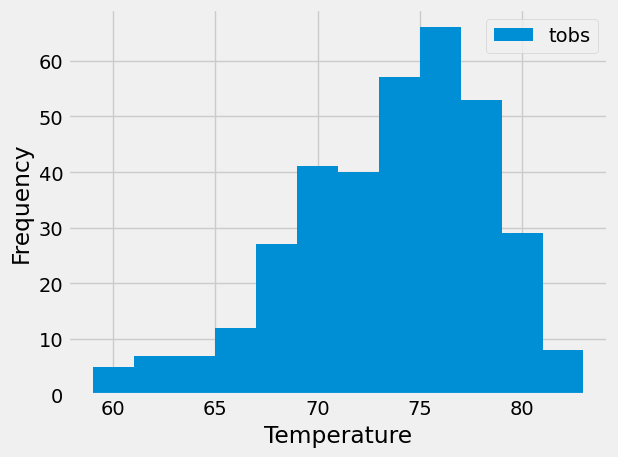

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(Measurement.tobs).filter(Measurement.station==active_station_id).filter(Measurement.date>=last_date).all()

#creating dataframe from results
temp_df = pd.DataFrame(results, columns=["tobs"])

#plotting histogram
temp_df.hist(bins=12, legend="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("")
plt.tight_layout()


# Close Session

In [148]:
# Close Session
session.close()